In [ ]:
#cargar librerias
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import math

In [ ]:
#cargar imagen
image = loadmat('/content/drive/My Drive/Colab Notebooks/datasets/BGU_4.mat').get('rad')[:,:,:]
#image = np.round(image.astype('float64')/np.max(image) , 4)
Nn,Mn,L1 = image.shape[0], image.shape[1],image.shape[2]

In [ ]:
#@title Parametros generales
#Densidad de grooves
Minimo_numero_grooves = 200#@param {type:"number"}  grooves por mm
Máximo_numero_grooves = 700#@param {type:"number"}  grooves por mm
densidad_grooves_min = Minimo_numero_grooves / 1e-3
densidad_grooves_max = Máximo_numero_grooves / 1e-3

#tamaño del pixel del sensor
pix_sensor = 4.65*1e-6 #tamaño estandar sensor laboratorio 
dimension_sensor = L1* pix_sensor

#configuracion littrow
orden =  -1#@param {type:"number"}
ondas = (np.linspace(400,700,31).reshape(L1,1))*1e-9
onda_central = (np.max(ondas) + np.min(ondas))/2

angulo_incidencia = math.degrees(math.asin( (orden*(densidad_grooves_max)*onda_central)/2))

distancia_focal = ((L1-5)*(pix_sensor)*(math.cos(math.radians(angulo_incidencia))) / (densidad_grooves_max* ( np.max(ondas) - np.min(ondas))) )

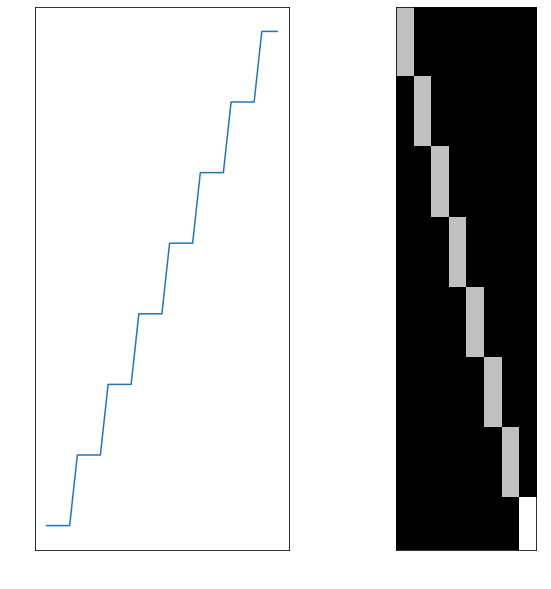

In [ ]:
#@title Configuración Grating 1

Numero_grooves = 200#@param {type:"slider", min:200, max:800, step:200}
distancia_entre_grooves = 1e-3/Numero_grooves


#parametros de configuracion por grating
angulos_salida = np.asarray([ math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda)) /distancia_entre_grooves)      )) for onda in ondas ]).astype('float32')

gamm = angulo_incidencia - math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda_central)) /distancia_entre_grooves) ))
gamm = gamm/2
angulos_salida_rectificados = angulos_salida -(2*angulo_incidencia) + (2*gamm) 

alts = np.asarray([distancia_focal * math.tan(math.radians(angulo)) for angulo in angulos_salida_rectificados])
alts_g = np.abs(np.asarray([alt - distancia_focal *math.tan(math.radians(angulos_salida_rectificados[0])) for alt in alts ]))


indice_pix = np.asarray([alt_g//pix_sensor for alt_g in alts_g])
#indice_pix[-1] = indice_pix[-1] -1


#Matrix de grating

D = np.zeros((L1,int(np.max(indice_pix))+1))
for i in range(int(np.max(indice_pix))+1):
  aux = np.zeros((L1,1))
  posiciones = np.where(indice_pix == i)  
  aux[posiciones] = 1
  D[:,i] = aux.squeeze()

D_Z = np.sum(D,axis=0)
D_Z = np.where(D_Z==0, 0.001,D_Z)
sum_D = 1/D_Z.reshape(1,int(np.max(indice_pix)+1))
D1 = (D * np.repeat(sum_D, L1, axis=0))


#figuras 1
plt.rcParams["figure.figsize"] = (10,10)
fig, (ax,ax1) = plt.subplots(1,2)

ax.plot(ondas,indice_pix,)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('número de pixeles en el sensor')
ax.set_xlabel('longitudes de onda')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax1.imshow(D1,cmap='gray')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_ylabel('número de canales de la imagen')
ax1.set_xlabel('número de pixeles en el sensor')
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
plt.show()

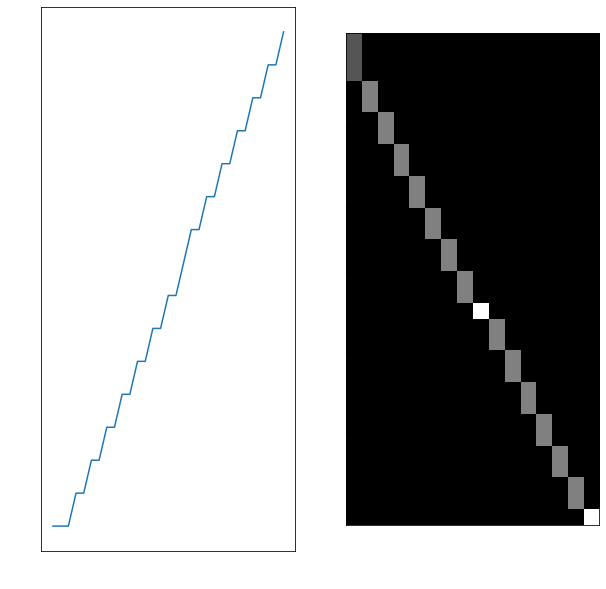

In [ ]:
#@title Configuración  grating 2
Numero_grooves = 400#@param {type:"slider", min:200, max:800, step:200}
distancia_entre_grooves = 1e-3/Numero_grooves


#parametros de configuracion por grating
angulos_salida = np.asarray([ math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda)) /distancia_entre_grooves)      )) for onda in ondas ]).astype('float32')

gamm = angulo_incidencia - math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda_central)) /distancia_entre_grooves) ))
gamm = gamm/2
angulos_salida_rectificados = angulos_salida -(2*angulo_incidencia) + (2*gamm) 

alts = np.asarray([distancia_focal * math.tan(math.radians(angulo)) for angulo in angulos_salida_rectificados])
alts_g = np.abs(np.asarray([alt - distancia_focal *math.tan(math.radians(angulos_salida_rectificados[0])) for alt in alts ]))

indice_pix = np.asarray([alt_g//pix_sensor for alt_g in alts_g])
#indice_pix[-1] = indice_pix[-1] -1


#Matrix de grating

D = np.zeros((L1,int(np.max(indice_pix))+1))
for i in range(int(np.max(indice_pix))+1):
  aux = np.zeros((L1,1))
  posiciones = np.where(indice_pix == i)  
  aux[posiciones] = 1
  D[:,i] = aux.squeeze()

D_Z = np.sum(D,axis=0)
D_Z = np.where(D_Z==0, 0.001,D_Z)
sum_D = 1/D_Z.reshape(1,int(np.max(indice_pix)+1))
D2 = (D * np.repeat(sum_D, L1, axis=0))


#figuras 1
plt.rcParams["figure.figsize"] = (10,10)
fig, (ax,ax1) = plt.subplots(1,2)

ax.plot(ondas,indice_pix,)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('número de pixeles en el sensor')
ax.set_xlabel('longitudes de onda')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax1.imshow(D2,cmap='gray')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_ylabel('número de canales de la imagen')
ax1.set_xlabel('número de pixeles en el sensor')
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
plt.show()


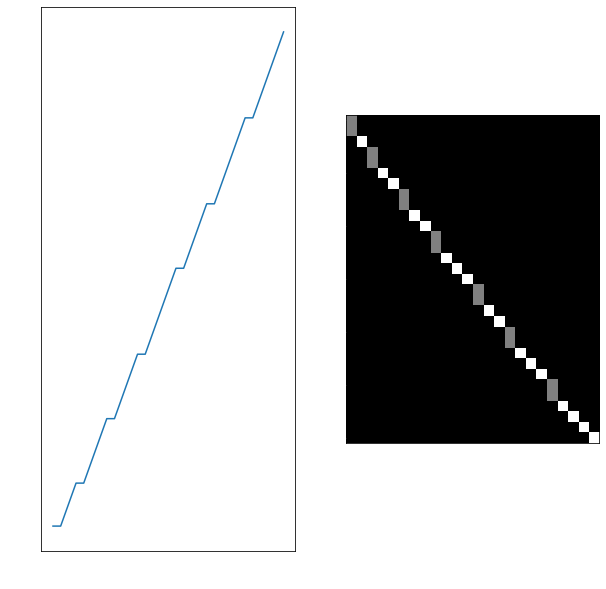

In [ ]:
#@title Configuración grating 3
Numero_grooves = 600#@param {type:"slider", min:200, max:800, step:200}
distancia_entre_grooves = 1e-3/Numero_grooves

#parametros de configuracion por grating
angulos_salida = np.asarray([ math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda)) /distancia_entre_grooves)      )) for onda in ondas ]).astype('float32')

gamm = angulo_incidencia - math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda_central)) /distancia_entre_grooves) ))
gamm = gamm/2
angulos_salida_rectificados = angulos_salida -(2*angulo_incidencia) + (2*gamm) 

alts = np.asarray([distancia_focal * math.tan(math.radians(angulo)) for angulo in angulos_salida_rectificados])
alts_g = np.abs(np.asarray([alt - distancia_focal *math.tan(math.radians(angulos_salida_rectificados[0])) for alt in alts ]))


indice_pix = np.asarray([alt_g//pix_sensor for alt_g in alts_g])
#indice_pix[-1] = indice_pix[-1] -1


#Matrix de grating

D = np.zeros((L1,int(np.max(indice_pix))+1))
for i in range(int(np.max(indice_pix))+1):
  aux = np.zeros((L1,1))
  posiciones = np.where(indice_pix == i)  
  aux[posiciones] = 1
  D[:,i] = aux.squeeze()

D_Z = np.sum(D,axis=0)
D_Z = np.where(D_Z==0, 0.001,D_Z)
sum_D = 1/D_Z.reshape(1,int(np.max(indice_pix)+1))
D3 = (D * np.repeat(sum_D, L1, axis=0))


#figuras 1
plt.rcParams["figure.figsize"] = (10,10)
fig, (ax,ax1) = plt.subplots(1,2)

ax.plot(ondas,indice_pix,)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('número de pixeles en el sensor')
ax.set_xlabel('longitudes de onda')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax1.imshow(D3,cmap='gray')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_ylabel('número de canales de la imagen')
ax1.set_xlabel('número de pixeles en el sensor')
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
plt.show()

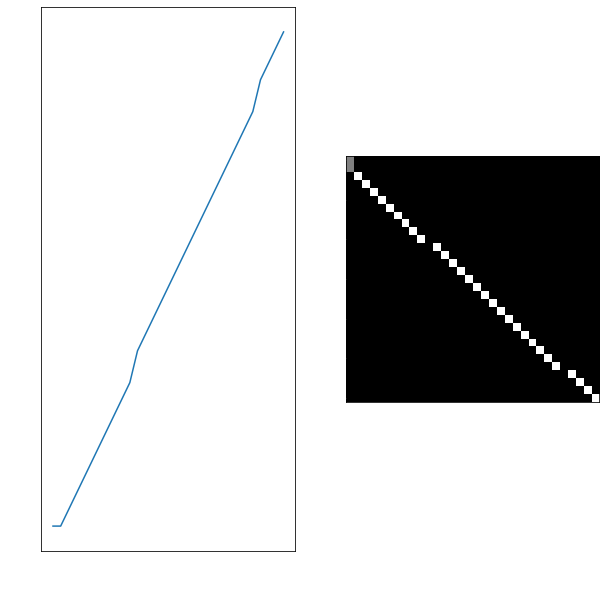

In [ ]:
#@title Configuración grating 4
Numero_grooves = 800#@param {type:"slider", min:200, max:800, step:200}
distancia_entre_grooves = 1e-3/Numero_grooves


#parametros de configuracion por grating
angulos_salida = np.asarray([ math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda)) /distancia_entre_grooves)      )) for onda in ondas ]).astype('float32')

gamm = angulo_incidencia - math.degrees(math.asin(  math.sin(math.radians(angulo_incidencia)) - ((orden * (onda_central)) /distancia_entre_grooves) ))
gamm = gamm/2
angulos_salida_rectificados = angulos_salida -(2*angulo_incidencia) + (2*gamm) 

alts = np.asarray([distancia_focal * math.tan(math.radians(angulo)) for angulo in angulos_salida_rectificados])
alts_g = np.abs(np.asarray([alt - distancia_focal *math.tan(math.radians(angulos_salida_rectificados[0])) for alt in alts ]))

indice_pix = np.asarray([alt_g//pix_sensor for alt_g in alts_g])
#indice_pix[-1] = indice_pix[-1] -1
#Matrix de grating

D = np.zeros((L1,int(np.max(indice_pix))+1))
for i in range(int(np.max(indice_pix))+1):
  aux = np.zeros((L1,1))
  posiciones = np.where(indice_pix == i)  
  aux[posiciones] = 1
  D[:,i] = aux.squeeze()

D_Z = np.sum(D,axis=0)
D_Z = np.where(D_Z==0, 0.001,D_Z)
sum_D = 1/D_Z.reshape(1,int(np.max(indice_pix)+1))
D4 = (D * np.repeat(sum_D, L1, axis=0))


#figuras 1
plt.rcParams["figure.figsize"] = (10,10)
fig, (ax,ax1) = plt.subplots(1,2)

ax.plot(ondas,indice_pix,)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('número de pixeles en el sensor')
ax.set_xlabel('longitudes de onda')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax1.imshow(D4,cmap='gray')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_ylabel('número de canales de la imagen')
ax1.set_xlabel('número de pixeles en el sensor')
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
plt.show()

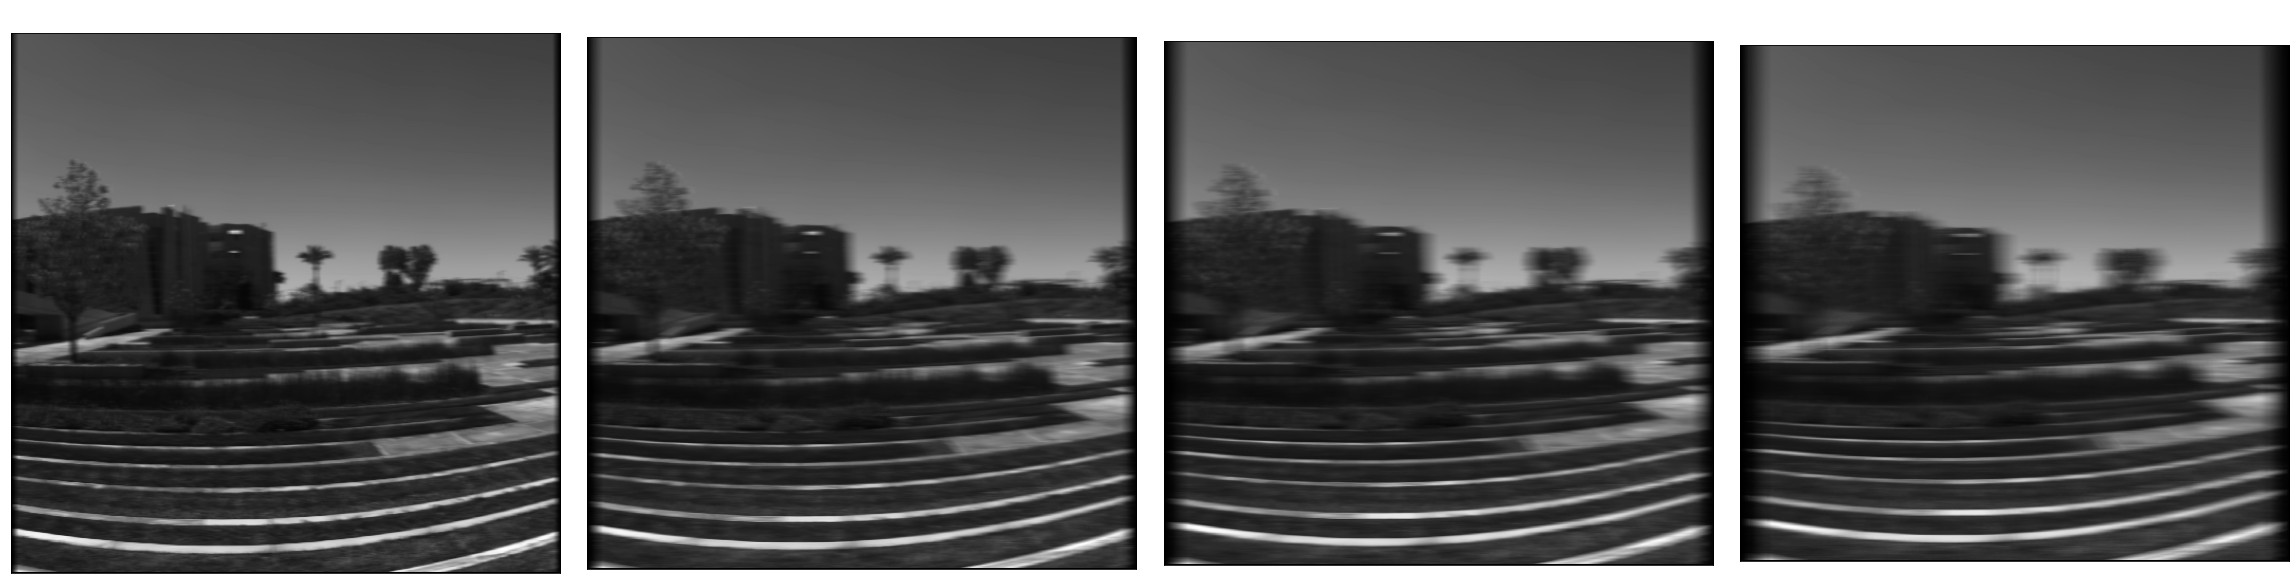

In [ ]:
#imagen con cada grating separado
import matplotlib.pyplot as plt
def plot_data(img,axis,k,g):
  axis.imshow(img,cmap='gray')
  axis.set_title('imagen con grating {}, {} grooves'.format(k,g))

index_D1= D1.shape[1]
index_D2= D2.shape[1]
index_D3= D3.shape[1]
index_D4= D4.shape[1]

fig = plt.figure(figsize=(400,400))
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.titlesize'] = 26
fig.subplots_adjust(left=0 , right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)
g=200
for k in range(4):
  k+=1
  
  sensor_individual = np.zeros(shape=(Nn,Mn+eval('index_D'+str(k))))
  for i in range(Nn):
    for j in range(Mn):
      sensor_individual[i,j:j+eval('index_D'+str(k))] =  sensor_individual[i,j:j++eval('index_D'+str(k))] + np.dot(image[i,j,:],eval('D'+str(k)))
  ax = fig.add_subplot(50,50,k,xticks=[],yticks=[])
  plot_data(sensor_individual,ax,k,g)
  g+=200

#Imágenes con Unión de Grating espacialmente concatenados 32x32

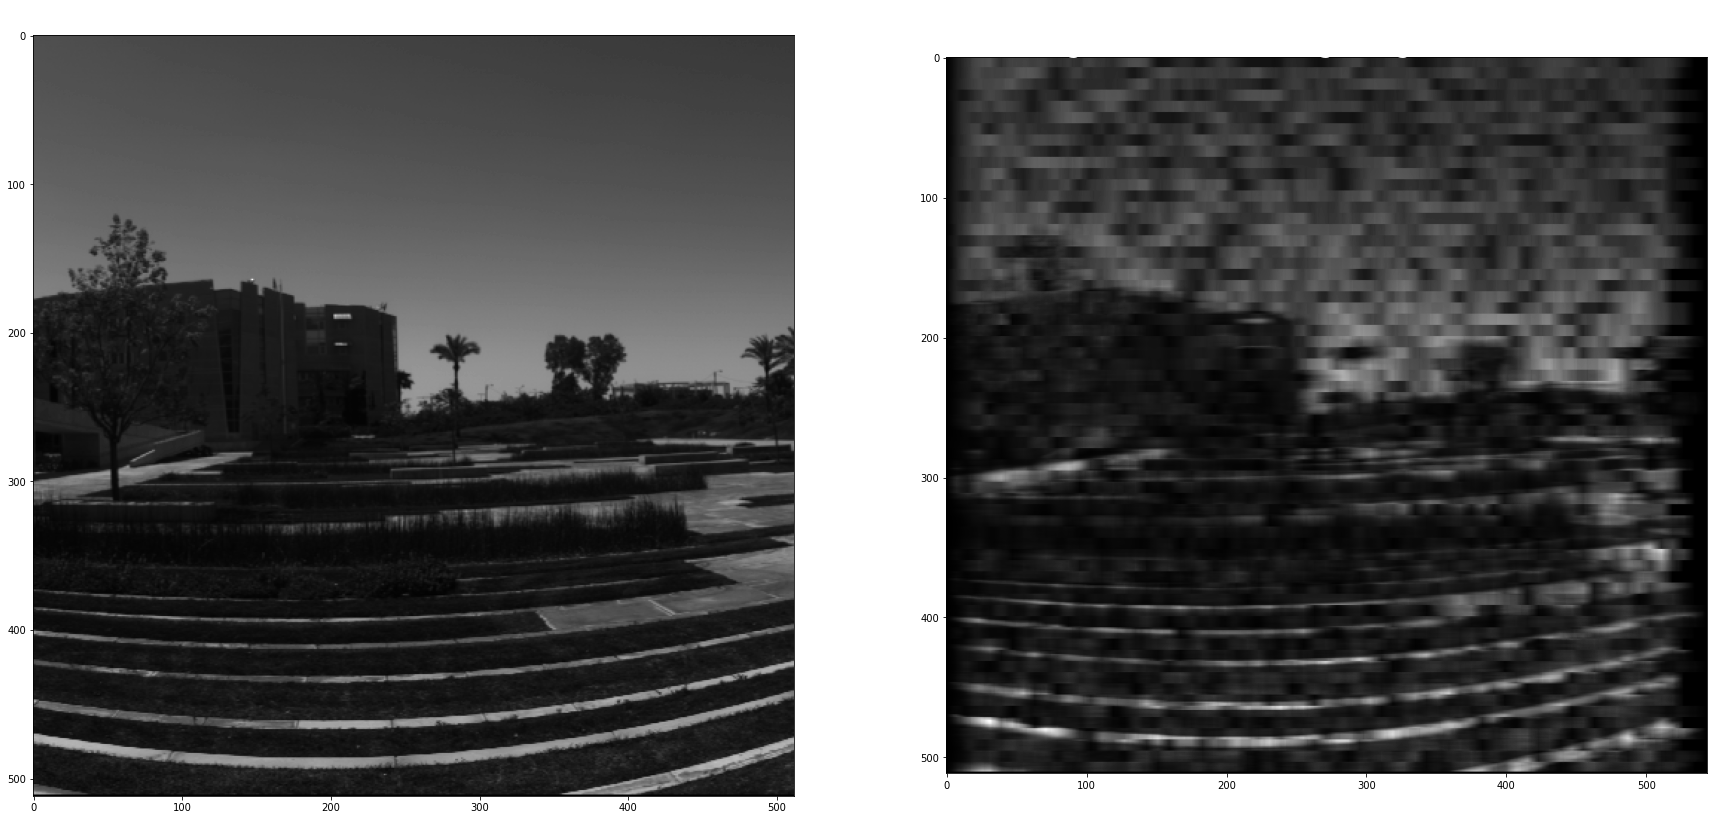

In [ ]:
#@title Elija el número de grating por fila y columna de la imagen general ex: 8, 16, 32, 64
l,p=1,1
r,g=0,0
numero_grating_en_imagen=64#@param {type:"number"}  grooves por mm
numero_grating_filas_columnas = numero_grating_en_imagen

grating_final={1:np.array(eval('D' + str(4)))}
sensor= np.zeros(shape=(Nn,Mn+grating_final[1].shape[1]))
for k in range(numero_grating_filas_columnas*numero_grating_filas_columnas):
    k+=1
    grating_final[k+1]=eval('D' + str(np.random.randint(0,4)+1))

grating={m:grating_final[m] for m in range(1,numero_grating_filas_columnas+1)}
for i in range(Nn):
  t=1
  
  if (i == (Mn/numero_grating_filas_columnas)*l ):
    g=numero_grating_filas_columnas*l
    grating={m+g:grating_final[m+g] for m in range(1,numero_grating_filas_columnas+1)}
    l+=1
    r+=numero_grating_filas_columnas
  p=1+r 
  #print(p)
  for j in range(Mn):
    #print(p)
    if (j < (Mn/numero_grating_filas_columnas)*t ):
      sensor[i,j:j+grating[p].shape[1]] =  sensor[i,j:j+grating[p].shape[1]] + np.dot(image[i,j,:],grating[p])
      if (j+1 == (Mn/numero_grating_filas_columnas)*t ):
        t+=1
        p+=1 

plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.titlesize'] = 26

fig , (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(image[:,:,10],cmap='gray')
ax1.set_title('Imágen Original')
ax2.imshow(sensor, cmap='gray')
ax2.set_title('Imágen con diferentes grating (measurements)')

plt.show()